<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week6/StrawberriesQACreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# BASED ON EXAMPLE FROM STACKEXCHANGE - JahKnows (2018)
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [0]:
# OBTAIN - OR RATHER CREATE SAMPLES BASED ON COLTON TEST DATA

# Number of Samples
n = 100000

data = []
for i in range(n):
    temp = {}
    
    # RANDOM NORMAL BASED ON COLTON - MEAN = 34  VARIANCE = 3
    # DISTRIBUTION CHOICES BASED ON ANALYSIS OF HISTORICAL OBSERVATIONS
    temp.update({'temperature': np.random.normal(34, 3)})
    
    # GET A COLOR
    color = 'red'
    color_random_value = np.random.randint(0,10)
    if color_random_value == 8:
        color = 'yellow'
    elif color_random_value == 9:
        color = 'green'
    temp.update({'color': color})
    
    # Get a random normally distributed moisture mean=96 and variance=2
    temp.update({'moisture': np.random.normal(96, 2)})

    # Verify if the instance is edible (label=0) or not (label=1)
    label = 0
    if temp['temperature'] < 31 or temp['temperature'] > 37:
        label = 1
    elif temp['color'] != 'red':
        label = 1
    elif temp['moisture'] < 94 or temp['moisture'] > 98:
        label = 1
    temp.update({'label': label})

    data.append(temp)
    
    

In [3]:
df = pd.DataFrame(data=data)
df.head()

,temperature,color,moisture,label
0,32.618511,red,98.703895,1
1,35.919095,red,98.311813,1
2,33.371200,yellow,96.970946,1
3,32.467685,red,97.141090,0
4,30.184612,red,94.948105,1


In [0]:
# SCRUB

df['color_codes'] =df['color'].astype('category').cat.codes


In [0]:
# SCRUB

X = np.asarray(df[['color_codes', 'moisture', 'temperature']])
y = np.asarray(df['label'])

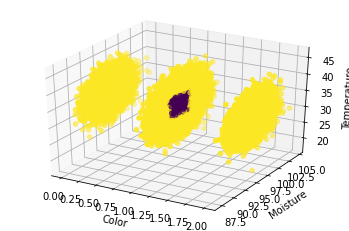

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

ax.set_xlabel('Color')
ax.set_ylabel('Moisture')
ax.set_zlabel('Temperature')

plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

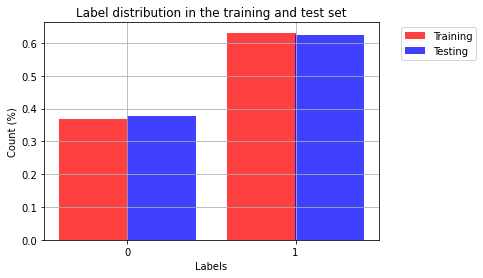

In [8]:
n_classes = 2

training_counts = [None] * n_classes 
testing_counts = [None] * n_classes
for i in range(n_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(n_classes)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(n_classes)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks((0,1))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

In [9]:
# MODEL BUILD - LINEAR

from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6232424242424243

In [15]:
# MODEL BUILD - SUPPORT VECTOR

from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6232424242424243

In [10]:
# MODEL BUILD - K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9973636363636363

In [11]:
# MODEL BUILD - K-Nearest Neighbors - Just fit/score Train

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train)


0.999

In [12]:
# MODEL BUILD - K-Nearest Neighbors - Just fit/score Test

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_test, y_test)
neigh.score(X_test, y_test)

0.9984242424242424

In [13]:
# MODEL BUILD - K-Nearest Neighbors - Just fit/score entire sample

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
neigh.score(X, y)


0.99915

NOTE:  K-Nearest Neighbors is a "lazy" algorithm - the separation of test & training is not truly necessary - we simply present the separation to align with the concept of comparing strawberries to strawberries :)
More details available at https://scikit-learn.org/stable/modules/neighbors.html
Shout out to Suzy Park for the catch & comments!

In [14]:
# MODEL BUILD - RANDOM FORESTS

from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)

Score:  0.9998181818181818
